# Estimating Optimal Number of Topics in Non-negative Matrix Factorization (NMF) Using Reconstruction Error, Topic Coherence, and the Elbow Method (KneeLocator)

Topics: 55, Error: 400.34, Coherence: 0.7527


c:\Users\UPPL - 01\Downloads\Anaconda-coding\envs\bert-3\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Topics: 56, Error: 400.12, Coherence: 0.7479
Topics: 57, Error: 399.91, Coherence: 0.7532
Topics: 58, Error: 399.65, Coherence: 0.7496


c:\Users\UPPL - 01\Downloads\Anaconda-coding\envs\bert-3\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Topics: 59, Error: 399.43, Coherence: 0.7449


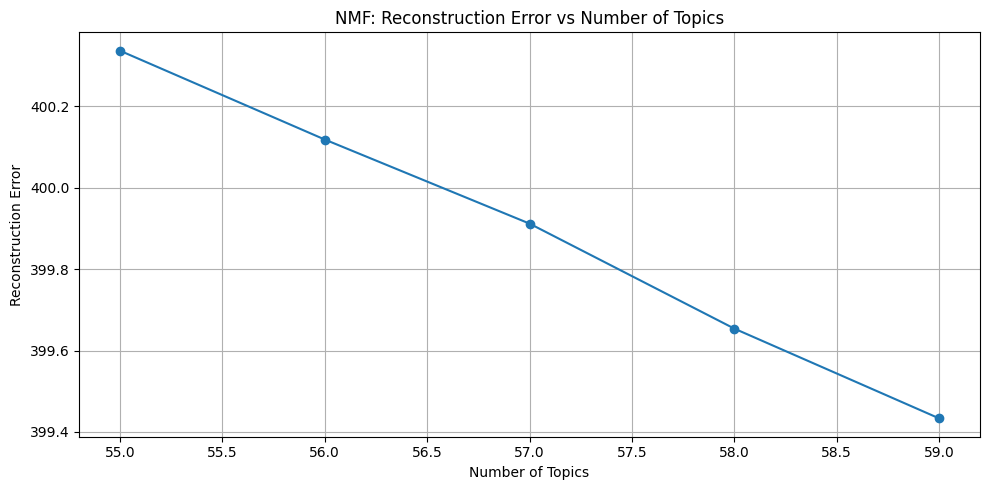

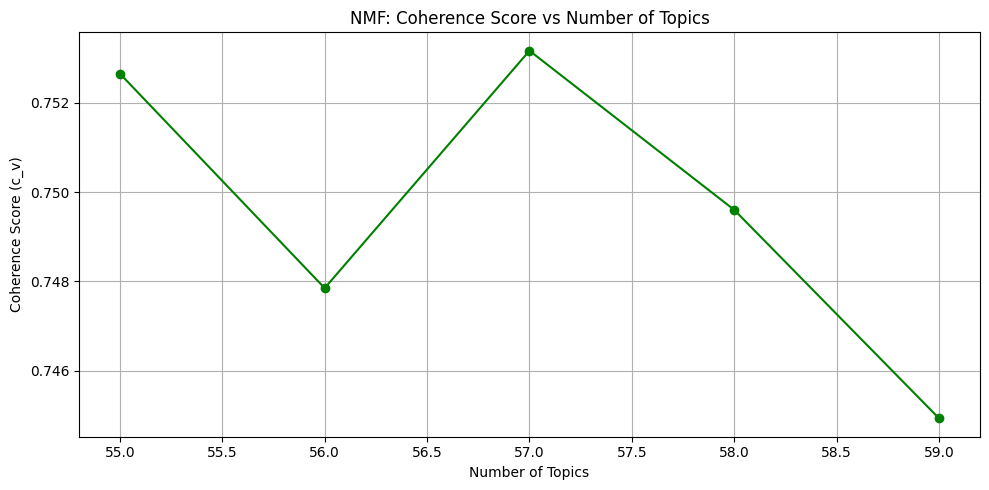


🦵 Elbow (Optimal Topic Count based on Error): None
🏆 Best Coherence Topic Count: 57 with score 0.7532


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from kneed import KneeLocator

# --- Step 1: Load dataset ---
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")
df['content_words'] = df['content_words'].apply(eval)
df['joined_content'] = df['content_words'].apply(lambda x: ' '.join(x))
texts = df['content_words'].tolist()

# --- Step 2: TF-IDF Vectorization ---
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.4,
    min_df=10,
    max_features=10000,
    stop_words='english'
)
tfidf = tfidf_vectorizer.fit_transform(df['joined_content'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# --- Step 3: Define function to extract topics from NMF ---
def get_nmf_topics(model, feature_names, topn=10):
    topics = []
    for topic_weights in model.components_:
        top_words = [feature_names[i] for i in topic_weights.argsort()[:-topn - 1:-1]]
        topics.append(top_words)
    return topics

# --- Step 4: Loop through topic numbers ---
topic_range = range(55, 60)
reconstruction_errors = []
coherence_scores = []

dictionary = Dictionary(texts)

for num_topics in topic_range:
    nmf_model = NMF(n_components=num_topics, random_state=42)
    W = nmf_model.fit_transform(tfidf)
    reconstruction_errors.append(nmf_model.reconstruction_err_)

    topics = get_nmf_topics(nmf_model, feature_names, topn=10)
    cm = CoherenceModel(
        topics=topics, texts=texts, dictionary=dictionary, coherence='c_v'
    )
    coherence = cm.get_coherence()
    coherence_scores.append(coherence)

    print(f"Topics: {num_topics}, Error: {nmf_model.reconstruction_err_:.2f}, Coherence: {coherence:.4f}")

# --- Step 5: Plot Reconstruction Error ---
plt.figure(figsize=(10, 5))
plt.plot(topic_range, reconstruction_errors, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Reconstruction Error")
plt.title("NMF: Reconstruction Error vs Number of Topics")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 6: Plot Coherence Score ---
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_scores, marker='o', color='green')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("NMF: Coherence Score vs Number of Topics")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 7: Find optimal number of topics using KneeLocator ---
knee = KneeLocator(
    list(topic_range), reconstruction_errors, curve="convex", direction="decreasing"
)
print(f"\n🦵 Elbow (Optimal Topic Count based on Error): {knee.elbow}")

# --- Step 8: Report topic with max coherence (optional) ---
best_coherence_k = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"🏆 Best Coherence Topic Count: {best_coherence_k} with score {max(coherence_scores):.4f}")


# WordCloud and Bar Chart as the Visualization of the Topic Modelling Result

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np
import pandas as pd

df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")
df.head()

outlet                                       article_text  \
0  CBC.ca  Tij Iginla doesn't shy away from his famous la...   
1  CBC.ca  Tij Iginla doesn't shy away from his famous la...   
2  CBC.ca  Tij Iginla doesn't shy away from his famous la...   
3  CBC.ca  Tij Iginla doesn't shy away from his famous la...   
4  CBC.ca  This week on The Sunday Magazine with host Piy...   

           nlp_label        nlp-image_label  \
0  Likely to be Bias  Likely to be Unbiased   
1  Likely to be Bias  Likely to be Unbiased   
2  Likely to be Bias  Likely to be Unbiased   
3  Likely to be Bias  Likely to be Unbiased   
4  Likely to be Bias  Likely to be Unbiased   

                                    content_sentence  \
0  tij iginla shy away famous last name instead e...   
1  mean thrilled go anywhere think would cool pla...   
2  flame currently hold ninth pick iginla happens...   
3  max plante son former nhl player derek mirosla...   
4  week sunday magazine host piya chattopadhyay s...   

                                       content_words  
0  ['tij', 'iginla', 'shy', 'away', 'famous', 'la...  
1  ['mean', 'thrilled', 'go', 'anywhere', 'think'...  
2  ['flame', 'currently', 'hold', 'ninth', 'pick'...  
3  ['max', 'plante', 'son', 'former', 'nhl', 'pla...  
4  ['week', 'sunday', 'magazine', 'host', 'piya',...

In [4]:
# additional pre-processing
custom_stopwords = set([
    "could", "should", "would", "may", "might", "said", "year", "just", "many", "even", 
    "still", "back",  "day", "week", "month", "use", "give", "take", "since", "much", 
    "got", "whether", "look", "always", "let", "yet", "asked", "across", "cooky", "cookie",
    "cookies", "setting", "settings", "site", "sites", "website", "websites", "web", "page",
    "browser", "privacy", "advertisement", "advertisements", "ad", "ads", "clear", "real", 
    "associated", "th"])

# Uncomment this line when running the code for the first time after importing csv
df['content_words'] = df['content_words'].apply(eval)

df['content_words'] = df['content_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

df["content_sentence"] = df["content_words"].apply(lambda x: " ".join(x))

# drop all null values

df.head()

outlet                                       article_text  \
0  CBC.ca  Tij Iginla doesn't shy away from his famous la...   
1  CBC.ca  Tij Iginla doesn't shy away from his famous la...   
2  CBC.ca  Tij Iginla doesn't shy away from his famous la...   
3  CBC.ca  Tij Iginla doesn't shy away from his famous la...   
4  CBC.ca  This week on The Sunday Magazine with host Piy...   

           nlp_label        nlp-image_label  \
0  Likely to be Bias  Likely to be Unbiased   
1  Likely to be Bias  Likely to be Unbiased   
2  Likely to be Bias  Likely to be Unbiased   
3  Likely to be Bias  Likely to be Unbiased   
4  Likely to be Bias  Likely to be Unbiased   

                                    content_sentence  \
0  tij iginla shy away famous last name instead e...   
1  mean thrilled go anywhere think cool play cana...   
2  flame currently hold ninth pick iginla happens...   
3  max plante son former nhl player derek mirosla...   
4  sunday magazine host piya chattopadhyay sunday...   

                                       content_words  
0  [tij, iginla, shy, away, famous, last, name, i...  
1  [mean, thrilled, go, anywhere, think, cool, pl...  
2  [flame, currently, hold, ninth, pick, iginla, ...  
3  [max, plante, son, former, nhl, player, derek,...  
4  [sunday, magazine, host, piya, chattopadhyay, ...

In [5]:
df.dropna(inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
train_text, test_text = train_test_split(df['content_sentence'], test_size=0.2, random_state=42)

In [7]:
# Step 1: Generate TF-IDF matrix
vectorizer = TfidfVectorizer(
    max_df=0.8,         
    min_df=10,          
    max_features=10000,
    stop_words='english'
)
tfidf = vectorizer.fit_transform(train_text)

# Step 2: Fit the NMF model
n_topics = 57  
nmf = NMF(n_components=n_topics, random_state=42)
W = nmf.fit_transform(tfidf)   # Document-topic matrix
H = nmf.components_        # Topic-term matrix

# Step 3: Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()

def display_topics(H, feature_names, top_words=5):
    for topic_idx, topic in enumerate(H):
        top_features = [feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]
        print(f"Topic #{topic_idx + 1}: {' | '.join(top_features)}")

display_topics(H, feature_names)


Topic #1: president | vice | donald | joe | presidential
Topic #2: service | visit | information | advertiser | collect
Topic #3: company | business | market | investment | stock
Topic #4: edition | national | post | epaper | replica
Topic #5: module | automobile | consent | saved | developed
Topic #6: trump | donald | cohen | trial | daniel
Topic #7: biden | joe | democrat | hunter | race
Topic #8: party | democratic | leader | candidate | political
Topic #9: service | choice | affect | device | paramount
Topic #10: say | thing | expert | really | mean
Topic #11: israel | hamas | gaza | israeli | war
Topic #12: harris | kamala | vice | democratic | nominee
Topic #13: state | united | ballot | law | michigan
Topic #14: ukraine | russia | russian | ukrainian | war
Topic #15: content | capable | building | network | sharing
Topic #16: convention | dnc | chicago | night | democratic
Topic #17: election | vote | result | presidential | voting
Topic #18: republican | democrat | senate | pri

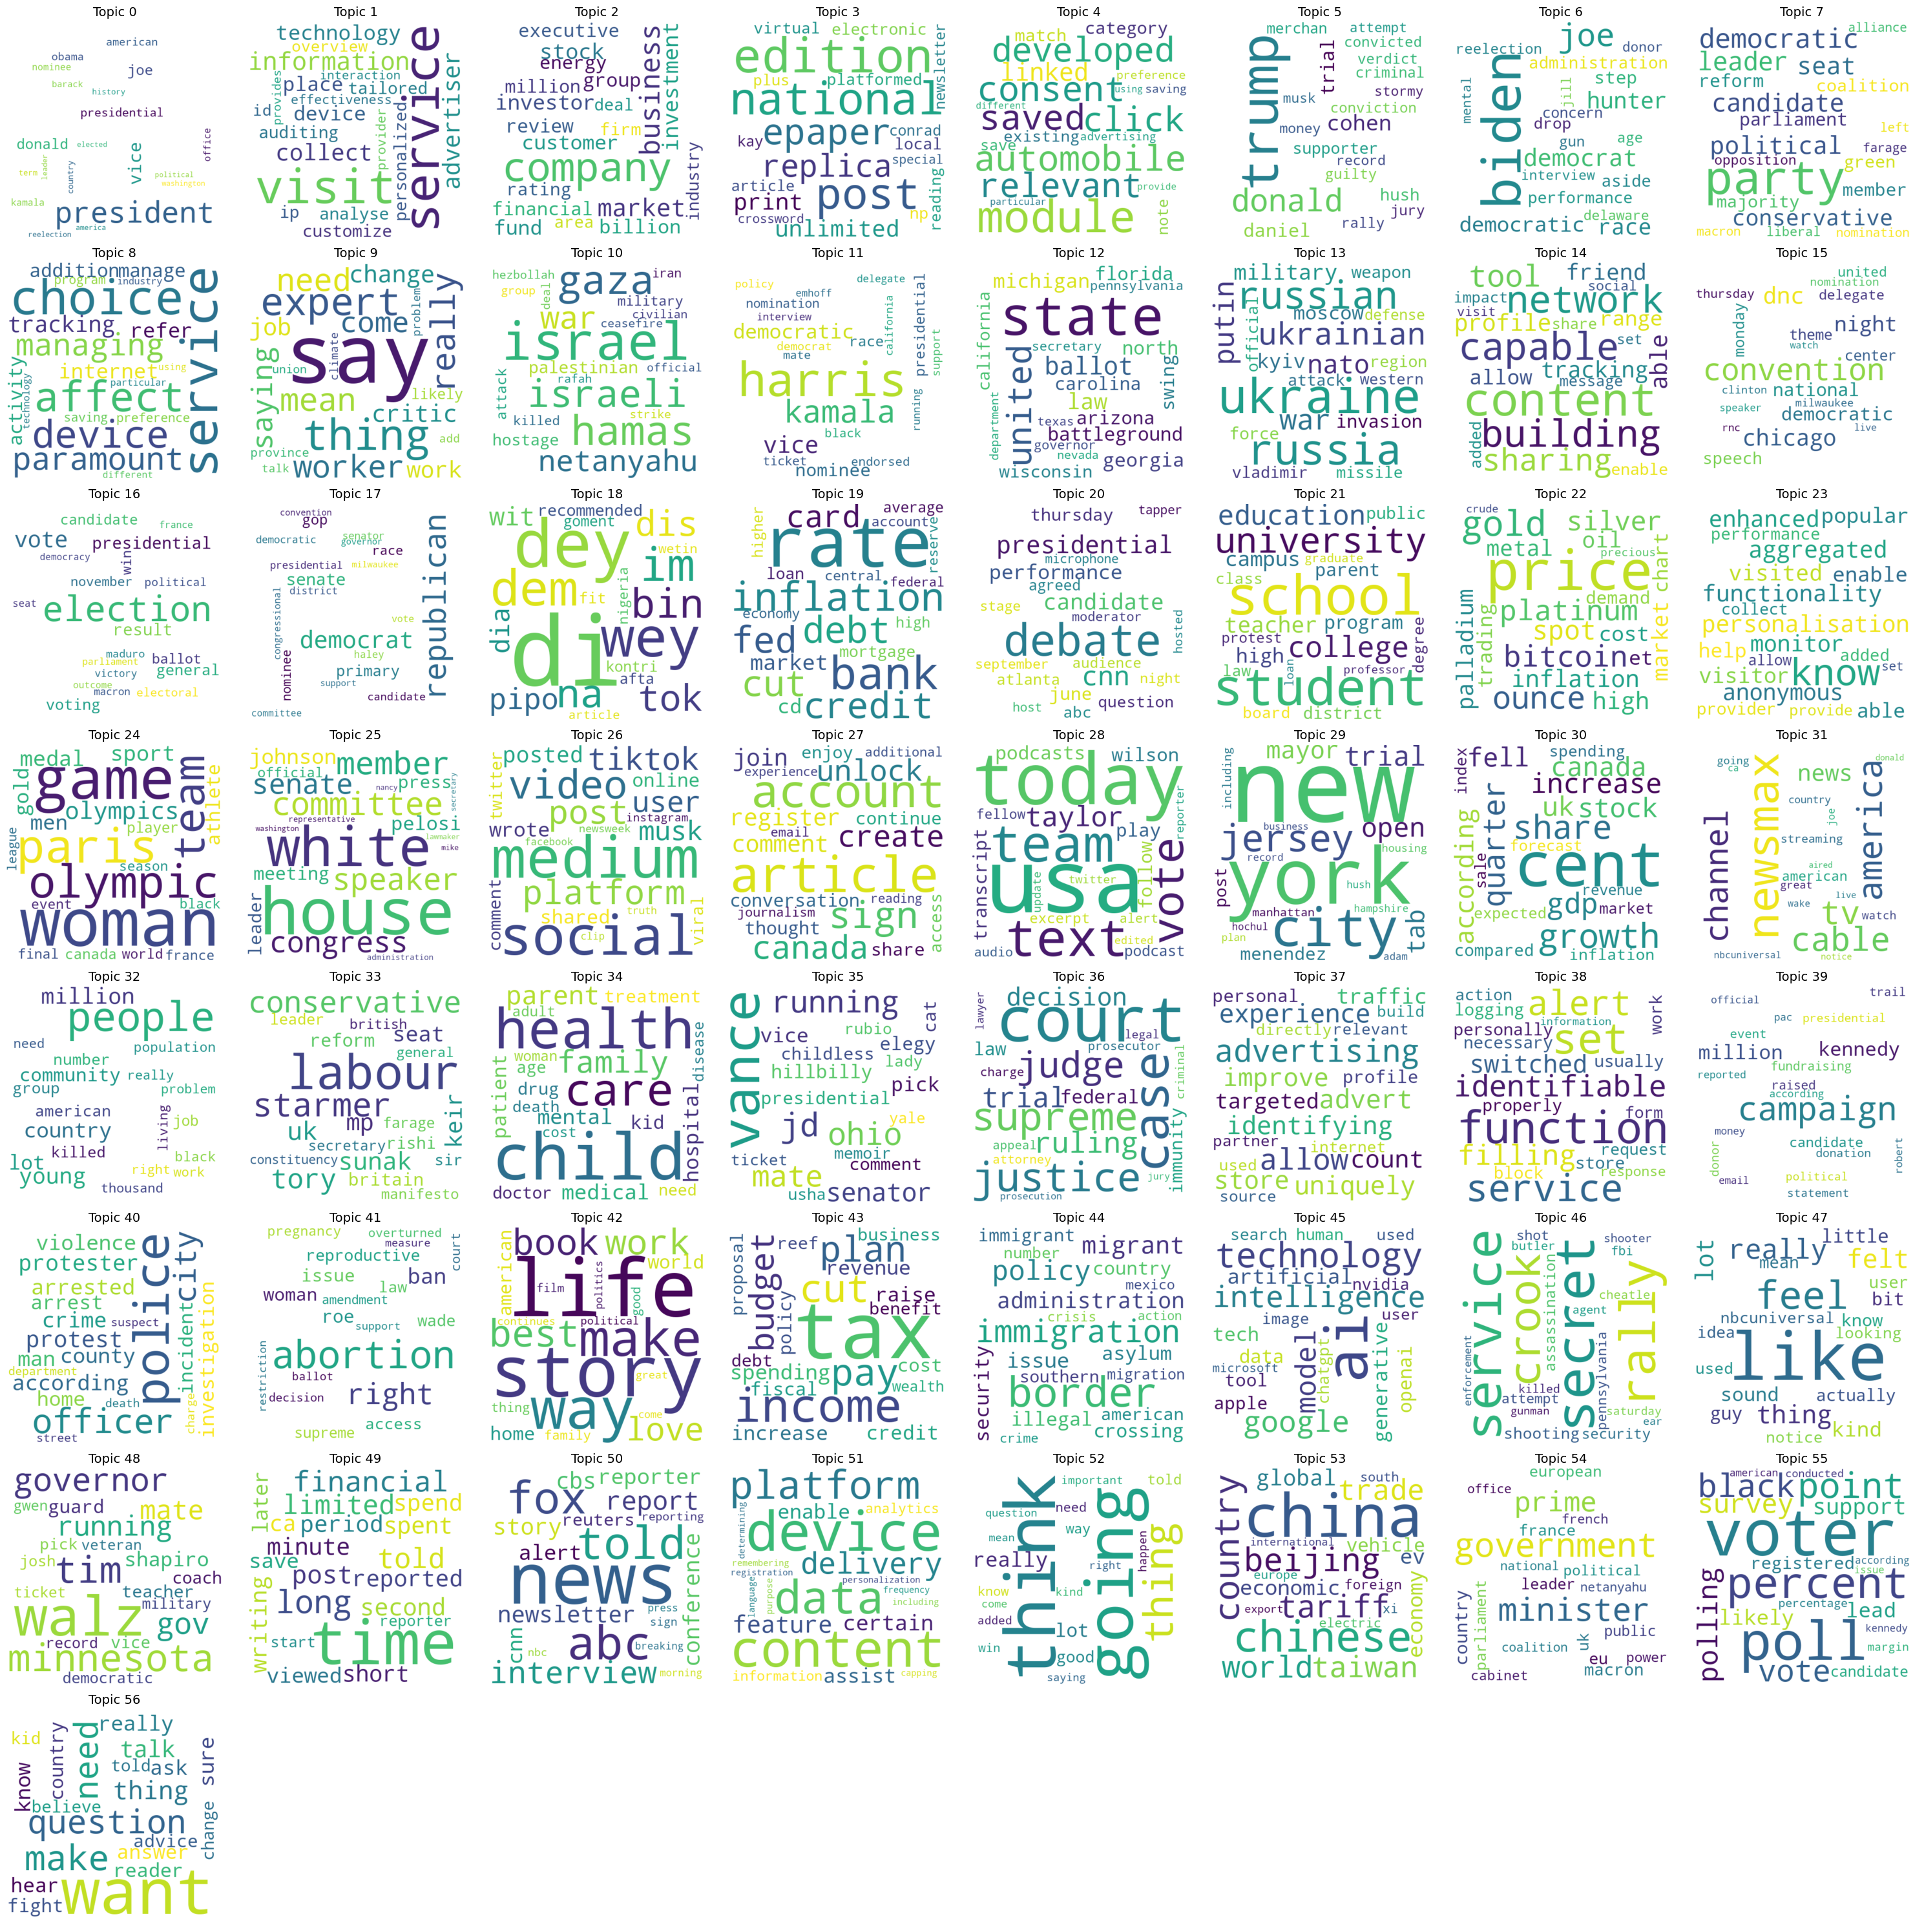

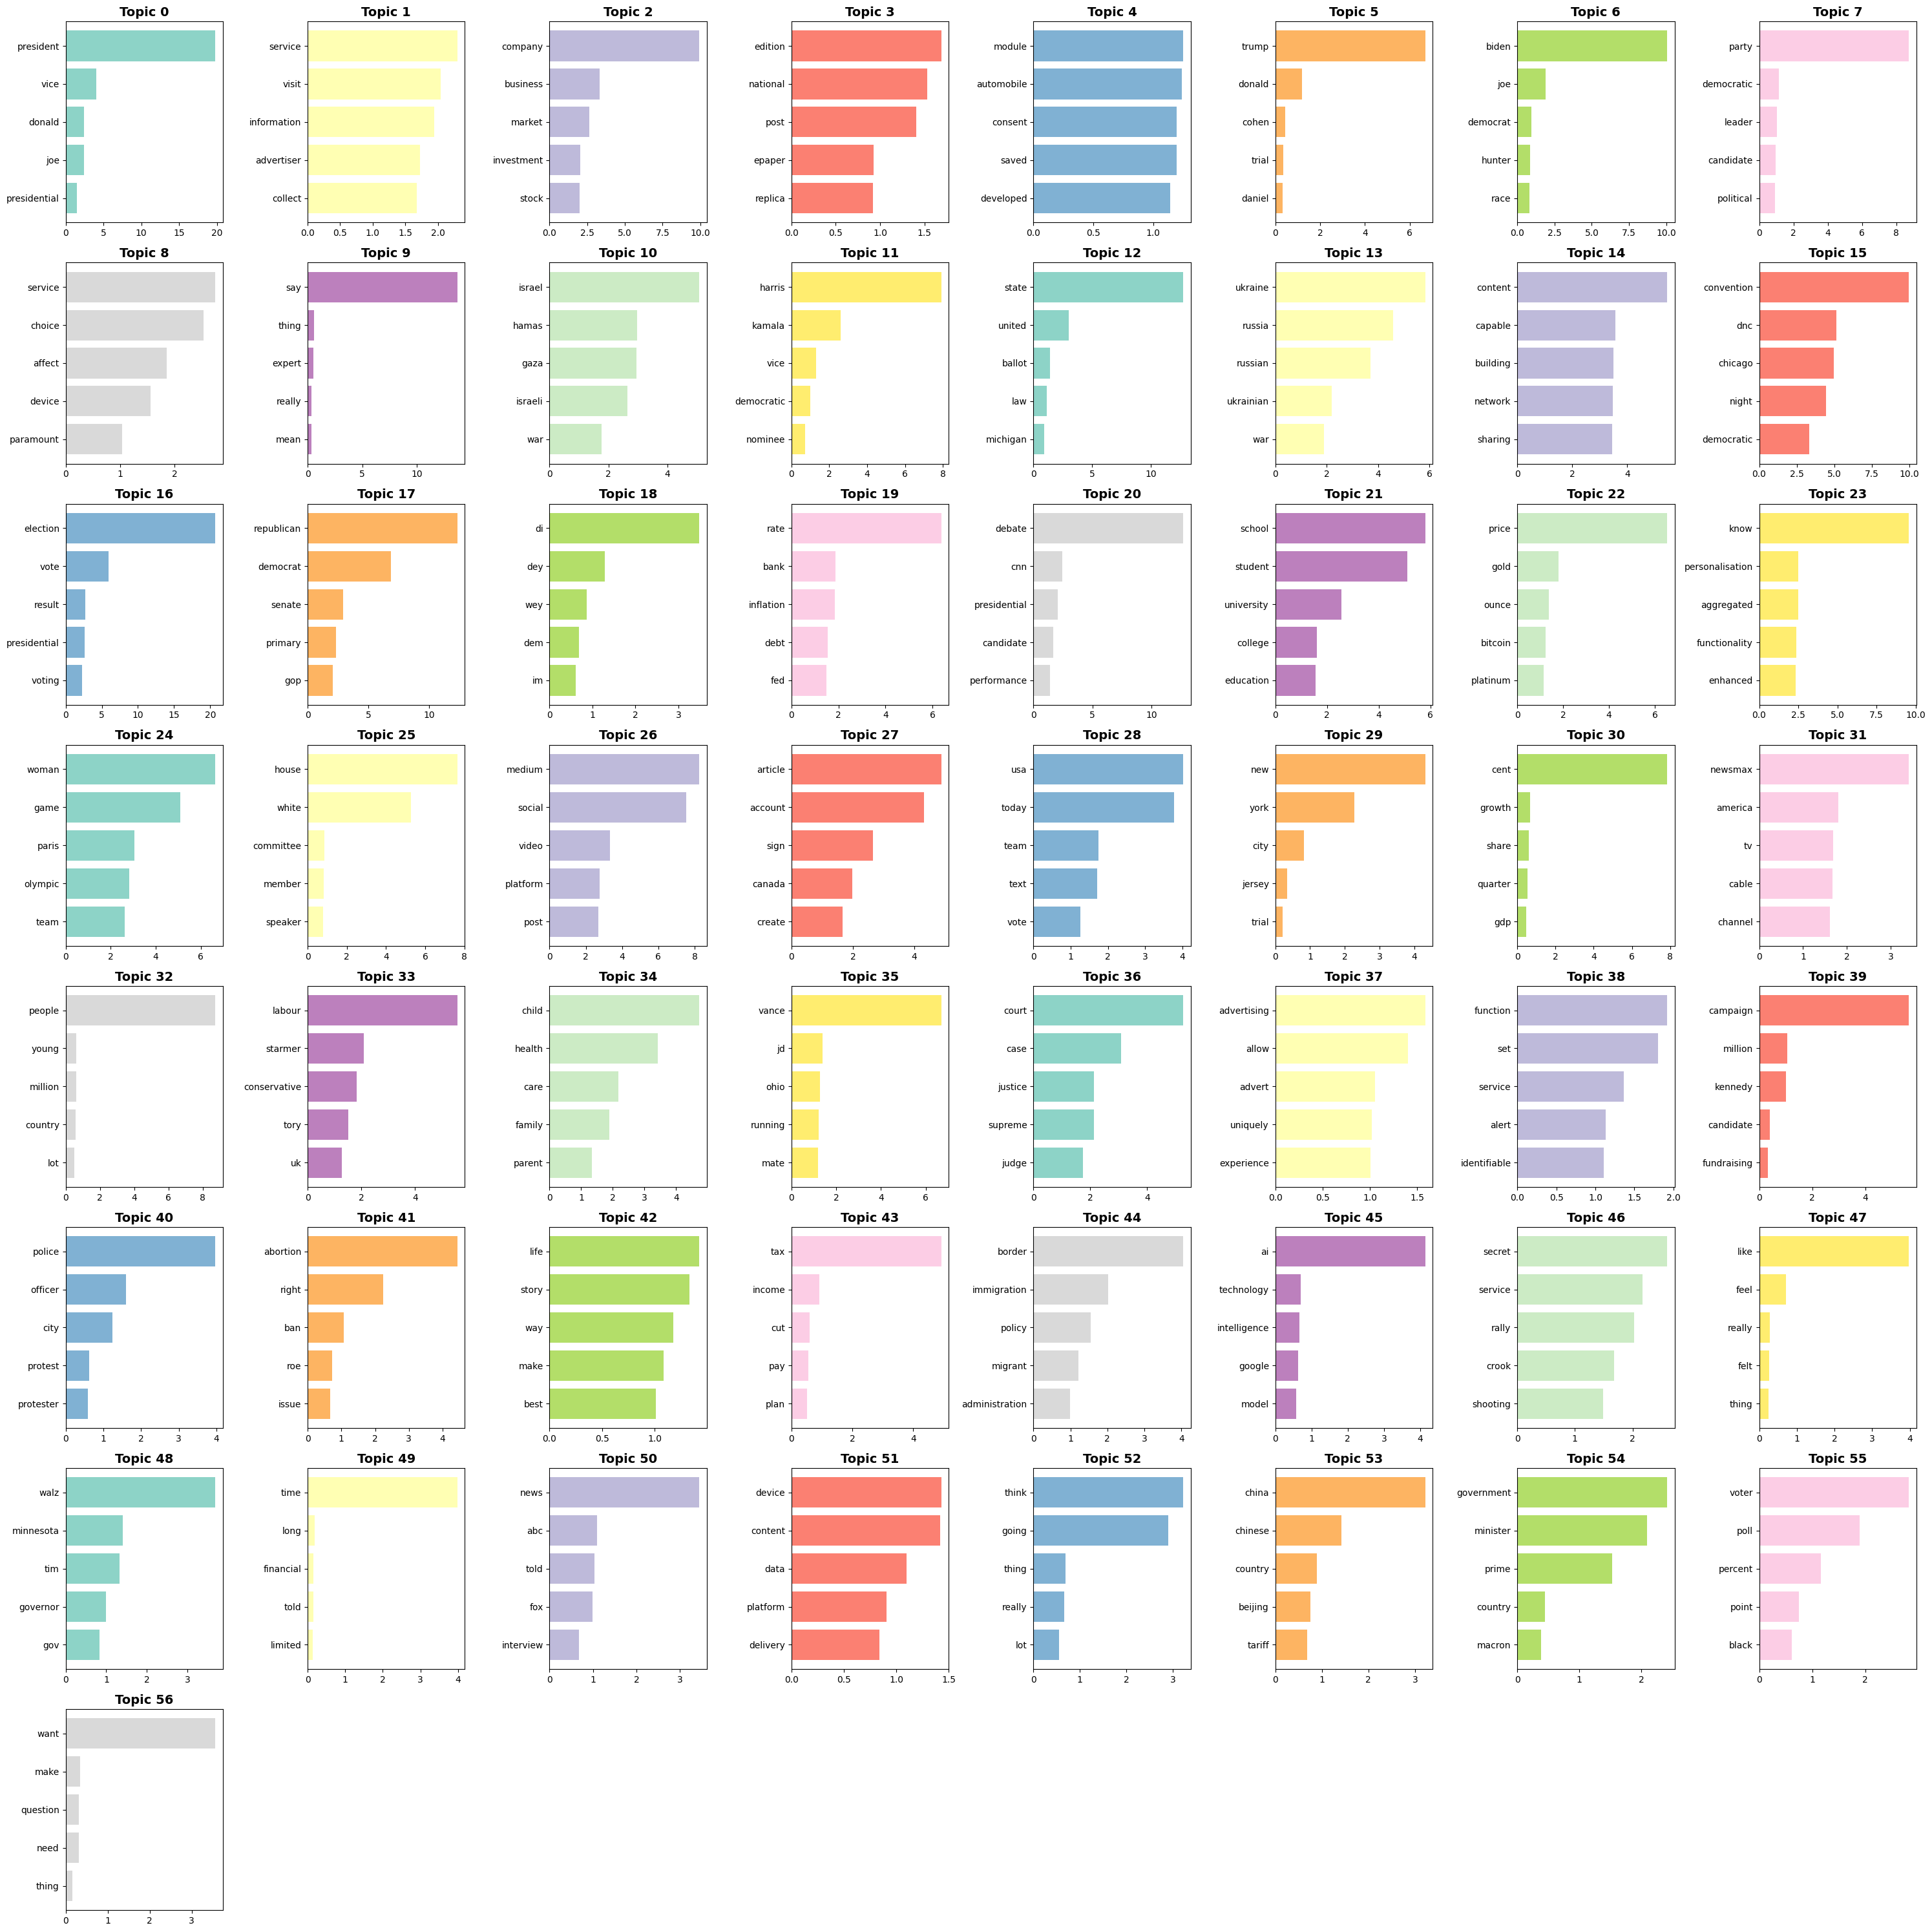

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(30, 30))  # Adjusted to fit 57 charts
axes = axes.flatten()

for i, topic in enumerate(H[:57]):  # Limit to 57 topics
    top_words = {feature_names[j]: topic[j] for j in topic.argsort()[:-21:-1]}
    wordcloud = WordCloud(
        width=500,
        height=500,
        background_color='white',
    ).generate_from_frequencies(top_words)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f"Topic {i}", fontsize=14)

# Hide any unused subplots
for j in range(57, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

# Step 7: Bar chart visualization
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(30, 30))  # Adjusted to fit 57 charts
axes = axes.flatten()
distinct_colors = sns.color_palette("Set3", 57)

for i, topic in enumerate(H[:57]):  # Limit to 57 topics
    top_indices = topic.argsort()[:-6:-1]
    words = [feature_names[j] for j in top_indices]
    values = topic[top_indices]

    axes[i].barh(words, values, color=distinct_colors[i])
    axes[i].invert_yaxis()
    axes[i].set_title(f"Topic {i}", fontsize=14, fontweight='bold')

# Hide any unused subplots
for j in range(57, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [12]:
import joblib
joblib.dump(nmf, "nmf_model.pkl")
joblib.dump(vectorizer, "nmf_vectorizer.pkl")

['nmf_vectorizer.pkl']

# Assigning Dominant NMF Topic to Each Article

In [2]:
import pandas as pd
import numpy as np
import joblib

# Step 1: Load TF-IDF and NMF model
tfidf_vectorizer = joblib.load("nmf_vectorizer.pkl")
nmf_model = joblib.load("nmf_model.pkl")

# Step 2: Load dataset and preprocess
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")
df['content_words'] = df['content_words'].apply(eval)
df['joined_content'] = df['content_words'].apply(lambda x: ' '.join(x))

# Step 3: Transform with TF-IDF and predict topic distribution
tfidf = tfidf_vectorizer.transform(df['joined_content'])
topic_distributions_nmf = nmf_model.transform(tfidf)

# Step 4: Assign dominant topic per sentence
df["dominant_topic_nmf"] = topic_distributions_nmf.argmax(axis=1)

# Step 5: Aggregate to article level (most frequent topic in an article)
article_topic_nmf = df.groupby("article_text")["dominant_topic_nmf"].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Step 6: Load previous LDA article file and merge NMF results
df_articles = pd.read_csv("../datasets/news_dataset.csv")
df_articles['article_words'] = df_articles['article_text'].astype(str).str.lower().str.strip()

# Merge the dominant topic information from article_topic_nmf
df_articles = df_articles.merge(article_topic_nmf, on="article_text", how="left")

# Step 7: Define NMF topic names (based on your attached wordcloud)
nmf_topic_labels = {
    1: "US Presidential Overview",
    2: "User Services & Data Collection",
    3: "Business & Investment",
    4: "Digital Editions & E-Papers",
    5: "Automobile Tech & Consent Modules",
    6: "Trump Legal Proceedings",
    7: "Biden & Democratic Politics",
    8: "Political Parties & Leadership",
    9: "Device Preferences & Paramount Services",
    10: "Expert Opinions & Analysis",
    11: "Israel-Hamas Conflict",
    12: "Kamala Harris & Vice Presidency",
    13: "State Ballot Laws & Elections",
    14: "Russia-Ukraine War",
    15: "Content Sharing & Network Capabilities",
    16: "Democratic National Convention",
    17: "Presidential Election & Voting",
    18: "US Senate & Party Primaries",
    19: "Pidgin News & Vernacular Media",
    20: "Economic Indicators & Interest Rates",
    21: "Presidential Debates & Media",
    22: "Education & Universities",
    23: "Commodities & Cryptocurrency Prices",
    24: "Personalization & Site Functionality",
    25: "Olympics & Women in Sports",
    26: "US House & Committees",
    27: "Social Media & Video Platforms",
    28: "Account Creation & Canadian Access",
    29: "USA Today & Voter Communication",
    30: "New York Trials & Legal News",
    31: "Economic Growth & GDP Reports",
    32: "Newsmax & Conservative Media",
    33: "Demographics & Youth Focus",
    34: "UK Politics & Party Landscape",
    35: "Family Health & Childcare",
    36: "JD Vance & Ohio Politics",
    37: "Courts & Supreme Justice",
    38: "Advertising Preferences & Experience",
    39: "Alert Services & Functional Identity",
    40: "Political Campaign Fundraising",
    41: "Law Enforcement & Protests",
    42: "Abortion Rights & Legislation",
    43: "Human Interest & Life Stories",
    44: "Tax Policy & Income Plans",
    45: "US Immigration & Border Policy",
    46: "Artificial Intelligence & Tech Giants",
    47: "Secret Service & Political Violence",
    48: "Personal Feelings & Reactions",
    49: "Minnesota Governance & Tim Walz",
    50: "Time & Financial Constraints",
    51: "News Media & Interviews",
    52: "Content Delivery Devices & Platforms",
    53: "Thoughts & Speculations",
    54: "China & International Trade",
    55: "Global Leaders & Government Affairs",
    56: "Voter Demographics & Polling",
    57: "Public Sentiment & Desires"
}

# Step 8: Add human-readable NMF topic name
df_articles["nmf_topic_name"] = df_articles["dominant_topic_nmf"].map(nmf_topic_labels)

# Step 9: Save final dataset
df_articles.to_csv("../datasets/articles_with_dominant_topic_nmf_updated.csv", index=False)

# Step 10: Preview
df_articles.head()


unique_id    outlet                                           headline  \
0  39e6104d56    CBC.ca  Tij Iginla embraces family name, eager to foll...   
1  89ce50166b    CBC.ca     The Sunday Magazine for June 23, 2024 - CBC.ca   
2  8b320e107e  CBC News  Conservative MP shares inaccurate, ChatGPT-gen...   
3  7536f87654    CBC.ca  Women's sports are more popular than ever, but...   
4  c829d1f9a8    CBC.ca           June 22: Listener Question Show - CBC.ca   

                  url                                       article_text  \
0  https://www.cbc.ca  Tij Iginla doesn't shy away from his famous la...   
1  https://www.cbc.ca  This week on The Sunday Magazine with host Piy...   
2  https://www.cbc.ca  An Ontario Conservative MP's use of ChatGPT to...   
3  https://www.cbc.ca  When it comes to the study of sports, a man's ...   
4  https://www.cbc.ca  To wrap up the 48th season of Quirks & Quarks,...   

                    image              nlp_label        nlp-image_label  \
0  images/39e6104d56.jpeg      Likely to be Bias  Likely to be Unbiased   
1  images/89ce50166b.jpeg      Likely to be Bias  Likely to be Unbiased   
2  images/8b320e107e.jpeg      Likely to be Bias      Likely to be Bias   
3  images/7536f87654.jpeg  Likely to be Unbiased  Likely to be Unbiased   
4  images/c829d1f9a8.jpeg      Likely to be Bias  Likely to be Unbiased   

                                       article_words  dominant_topic_nmf  \
0  tij iginla doesn't shy away from his famous la...                  52   
1  this week on the sunday magazine with host piy...                  54   
2  an ontario conservative mp's use of chatgpt to...                  43   
3  when it comes to the study of sports, a man's ...                  24   
4  to wrap up the 48th season of quirks & quarks,...                  49   

                         nmf_topic_name  
0  Content Delivery Devices & Platforms  
1           China & International Trade  
2         Human Interest & Life Stories  
3  Personalization & Site Functionality  
4       Minnesota Governance & Tim Walz